<a href="https://colab.research.google.com/github/sindhura-nk/Artificial-Intelligence_2_1377/blob/main/MultiClass_Classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass classification using keras
### EarlyStopping Implementation

## Step1: Data Ingestion/ Data Gathering

In [1]:
path = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/mobile_train%20(1).csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
df["price_range"].unique()

array([1, 2, 3, 0])

#### Target Feature: Price Range of the mobile needs to be predicted by the model
    0 - Cheap
    1 - Moderate
    2 - Good
    3 - Expensive

## Step2: Perform the basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
# Missing data
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [5]:
# duplicated records
df.duplicated().sum()

np.int64(0)

#### Current data doesnt contain any missing data nor any duplicated records
## Step3: Separate X and Y features

In [6]:
X = df.drop(columns=["price_range"])
Y = df[["price_range"]]

In [7]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [8]:
X.shape

(2000, 20)

In [9]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


## Step4: Data Cleaning and Preprocessing

In [10]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
df.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"),
                         StandardScaler()).set_output(transform='pandas')

In [14]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [15]:
Xpre = num_pipe.fit_transform(X)
Xpre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Step5: Split the dataset into training and testing

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xpre,Y,train_size=0.75,random_state=21)

In [17]:
xtrain.shape

(1500, 20)

In [18]:
xtest.shape

(500, 20)

In [19]:
ytrain.shape

(1500, 1)

In [20]:
ytest.shape

(500, 1)

In [21]:
ytrain.head()

,price_range
1527,3
1353,3
659,2
469,1
374,3


## Step 6: Preprocess Y data

In [22]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [23]:
ytrain_cat[:5]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [24]:
ytrain.head()

,price_range
1527,3
1353,3
659,2
469,1
374,3


## Step7: Model Building

In [25]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [26]:
ytrain_cat.shape

(1500, 4)

In [28]:
# Initialize the model
model = Sequential()
# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden layer1
model.add(Dense(units=64,activation="relu"))
# Add the Dropout layer
model.add(Dropout(rate=0.4))
# Add the Hidden layer
model.add(Dense(units=32,activation="relu"))
# Add the Dropout layer
model.add(Dropout(rate=0.25))
# Add the Output layer
model.add(Dense(units=ytrain_cat.shape[1],activation="softmax"))

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [31]:
es = EarlyStopping(monitor="val_loss",patience=10)

In [32]:
hist = model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.2713 - loss: 1.6147 - val_accuracy: 0.3433 - val_loss: 1.3627
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3191 - loss: 1.3562 - val_accuracy: 0.4033 - val_loss: 1.2691
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4239 - loss: 1.2626 - val_accuracy: 0.5433 - val_loss: 1.1482
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4604 - loss: 1.1630 - val_accuracy: 0.6100 - val_loss: 1.0081
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5146 - loss: 1.0458 - val_accuracy: 0.6333 - val_loss: 0.8819
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5654 - loss: 0.9416 - val_accuracy: 0.6867 - val_loss: 0.7780
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6180 - loss: 0.8333 - val_accuracy: 0.7200 - val_loss: 0.6952
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6441 - loss: 0.7811 - val_accuracy: 0.7500 - 

## Learning Curve

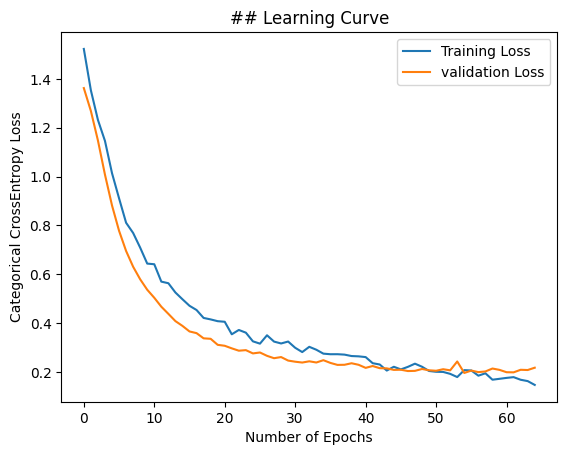

In [33]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label ="Training Loss")
plt.plot(hist.history['val_loss'],label="validation Loss")
plt.title("## Learning Curve")
plt.xlabel("Number of Epochs")
plt.ylabel("Categorical CrossEntropy Loss")
plt.legend()

## Step8: Evaluation Metrics

In [34]:
model.evaluate(xtrain,ytrain_cat)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9894 - loss: 0.0596


[0.0846729502081871, 0.9739999771118164]

In [35]:
model.evaluate(xtest,ytest_cat)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9166 - loss: 0.1859


[0.16878092288970947, 0.9259999990463257]

In [49]:
ytest_preds = model.predict(xtest)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [51]:
ytest_preds[:5]

array([[1.2209951e-25, 1.3659827e-07, 9.3960389e-02, 9.0603948e-01],
       [9.9845624e-01, 1.5437271e-03, 4.9614544e-13, 4.5925175e-40],
       [5.0363034e-01, 4.9636871e-01, 9.7940699e-07, 6.4826952e-24],
       [9.9954873e-01, 4.5120288e-04, 1.8312420e-15, 0.0000000e+00],
       [2.5663769e-33, 1.8030462e-10, 5.3079133e-03, 9.9469203e-01]],
      dtype=float32)

In [52]:
ytest_preds2 = np.argmax(ytest_preds,axis=1)
ytest_preds2[:5]

array([3, 0, 0, 0, 3])

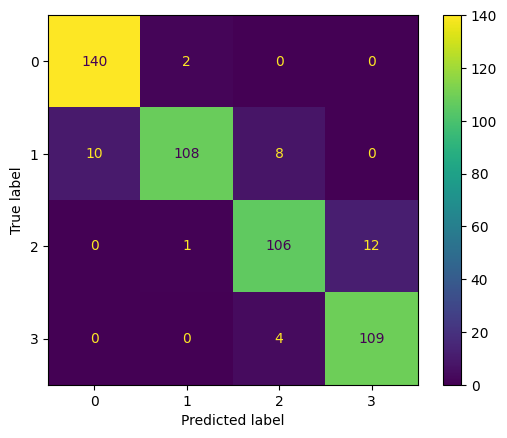

In [53]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
cf = confusion_matrix(ytest,ytest_preds2)
ConfusionMatrixDisplay(cf).plot()

In [54]:
print(classification_report(ytest,ytest_preds2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       142
           1       0.97      0.86      0.91       126
           2       0.90      0.89      0.89       119
           3       0.90      0.96      0.93       113

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.93      0.93       500



## We are getting the score around 93% in testing data. We can consider this model for final predictions

In [36]:
model.save("Mobile_predictions.keras")

In [37]:
path2 = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/mobile_test%20(1).csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [38]:
xnew_1 = xnew.drop(columns=["id"])

In [39]:
xnew_pre = num_pipe.transform(xnew_1)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [40]:
from keras.models import load_model
model_loaded = load_model('/content/Mobile_predictions.keras')
model_loaded.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,670 (41.68 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,114 (27.79 KB)

In [41]:
final_preds = model_loaded.predict(xnew_pre)
final_preds[:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


array([[2.5719089e-25, 2.8599018e-07, 1.6631749e-01, 8.3368224e-01],
       [9.2468853e-32, 7.3661999e-10, 1.3745500e-02, 9.8625445e-01],
       [3.2113261e-19, 5.8180140e-05, 8.9109176e-01, 1.0885005e-01],
       [1.1210388e-44, 2.2067072e-14, 7.4655178e-04, 9.9925345e-01],
       [9.1526320e-04, 9.9177599e-01, 7.3087416e-03, 1.3159389e-11]],
      dtype=float32)

In [42]:
import numpy as np
np.max(final_preds,axis=1)

array([0.83368224, 0.98625445, 0.89109176, 0.99925345, 0.991776  ,
       0.9913399 , 0.99944097, 0.9919179 , 0.9801317 , 0.9945655 ,
       0.9990583 , 0.99743587, 0.9951963 , 0.9880558 , 0.9862119 ,
       0.80174315, 0.9938447 , 0.9941115 , 0.9976761 , 0.8966294 ,
       0.6055658 , 0.9535285 , 0.6116278 , 0.9455169 , 0.9973349 ,
       0.9954001 , 0.7992125 , 0.9984661 , 0.54032993, 0.9966095 ,
       0.9630506 , 0.99652594, 0.9964808 , 0.9926817 , 0.86106163,
       0.98744404, 0.9947702 , 0.9960077 , 0.996132  , 0.9587678 ,
       0.8891753 , 0.9822646 , 0.9986721 , 0.9995011 , 0.99639124,
       0.77440894, 0.9118844 , 0.9883332 , 0.97831124, 0.9396967 ,
       0.98023   , 0.9975304 , 0.89509124, 0.99291867, 0.99804187,
       0.7315897 , 0.9984353 , 0.97174925, 0.7061549 , 0.9973464 ,
       0.9991386 , 0.75282043, 0.99332535, 0.8628576 , 0.7391327 ,
       0.9971904 , 0.9304001 , 0.9505393 , 0.9853147 , 0.9910637 ,
       0.9949719 , 0.8818299 , 0.99336463, 0.99754566, 0.99761

In [44]:
Y["price_range"].unique()

array([1, 2, 3, 0])

In [46]:
final_preds[:5]

array([[2.5719089e-25, 2.8599018e-07, 1.6631749e-01, 8.3368224e-01],
       [9.2468853e-32, 7.3661999e-10, 1.3745500e-02, 9.8625445e-01],
       [3.2113261e-19, 5.8180140e-05, 8.9109176e-01, 1.0885005e-01],
       [1.1210388e-44, 2.2067072e-14, 7.4655178e-04, 9.9925345e-01],
       [9.1526320e-04, 9.9177599e-01, 7.3087416e-03, 1.3159389e-11]],
      dtype=float32)

In [45]:
ypreds_final = np.argmax(final_preds,axis=1)
ypreds_final[:5]

array([3, 3, 2, 3, 1])

In [47]:
xnew["MobilePrice_Predictions"] = ypreds_final
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,MobilePrice_Predictions
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


In [48]:
xnew.to_csv("Predicted Results.csv",index=False)